### Практическая работа 1 (дедлайн 25 октября)

Подключение модулей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#### Описываем поставленную задачу...

Выбранный датасет представляет собо набор данных ежедневных метеорологических наблюдений.
Необходимо спрогнозировать какая погода будет на следующий день, то есть будет ли дождь или нет.

#### Считываем данные...

In [2]:
data = pd.read_csv('weather_dataset.csv')

Выводим данные...

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


Каждая строка вышеприведенной таблицы представляет собой определенный день, каждый столбец - определенный признак.

Признаки метеорологических наблюдений:

1.Date - дата;
2.Location - месторасположение метеостанции;
3.MinTemp - минимальная t°C; 
4.MaxTemp - максимальнаяt°C; 
5.Rainfall - осадки за сутки в мм; 
6.Evaporation - " испарение"(мм) за сутки в 9:00; 
7.Sunshine - солнечные часы в течение дня; 
8.WindGustDir - направление самого сильного порыва ветра в течение суток до 0:00; 
9.WindGustSpeed - скорость (км/ч) самого сильного порыва ветра за сутки до 0:00; 
10.WindDir9am - направление ветра в 9:00; 
11.WindDir3pm - направление ветра в 15:00; 
12.WindSpeed9am - средняя скорость (за 10 минут) ветра (км/ч) в 9:00; 
13.WindSpeed3pm - средняя скорость (за 10 минут) ветра (км/ч) в 15:00;
14.Humidity9am - влажность воздуха % в 9:00; 
15.Humidity3pm - влажность (в процентах) в 15:00; 
16.Pressure9am - среднее атмосферное давление над уровнем моря в 9:00; 
17.Pressure3pm - среднее атмосферное давление над уровнем моря в 15:00; 
18.Cloud9am - сколько октантов (небо разделяется на 8 частей) неба скрыто облаками. 0 - чистое небо, 8 - полностью затянуто облаками, в 9:00;
19.Cloud3pm - сколько неба скрыто облаками, в 15:00; 
20.Temp9am - t°C,9:00;
21.Temp3pm - t°C,15:00;
22.RainToday - 1, если Осадки в течение суток до 9:00 утра превышают 1 мм, в противном случае 0; 
23.RISK_MM - количество дождя на следующий день в мм;
24.RainTomorrow - будет ли завтра дождь; 

In [4]:
print(data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ... 

Выводим первые 5 строк таблицы...

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Выводим последние 5 строк таблицы...

In [6]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


Смотрим на размер данных...

In [7]:
print(data.shape)

(142193, 24)


В таблице 142193 строки и 24 столбца.

Смотрим на типы данных...

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
type(data['Date'])

pandas.core.series.Series

Выводим названия столбцов...

In [10]:
print(data.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


Смотрим общую информацию по текущему набору данных...

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Визуализируем данные и вычислияем основные характеристики, интерпретируем... 

Смотрим основные статистические характеристики данных... (средние значения, разброс, минимумы и максимумы)

По всем признакам:

In [12]:
data.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2014-11-18,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


По количественным признакам:

In [13]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Можно увидеть некоторые особенности набора данных, к примеру, сравнивая среднее значение и медиану, понимаем, какие значения преобладают в выборке, и если среднее значение больше, чем медиана, значит этот признак принимает меньшие значения чаще.

 Смотрим взаимосвязь между переменными...

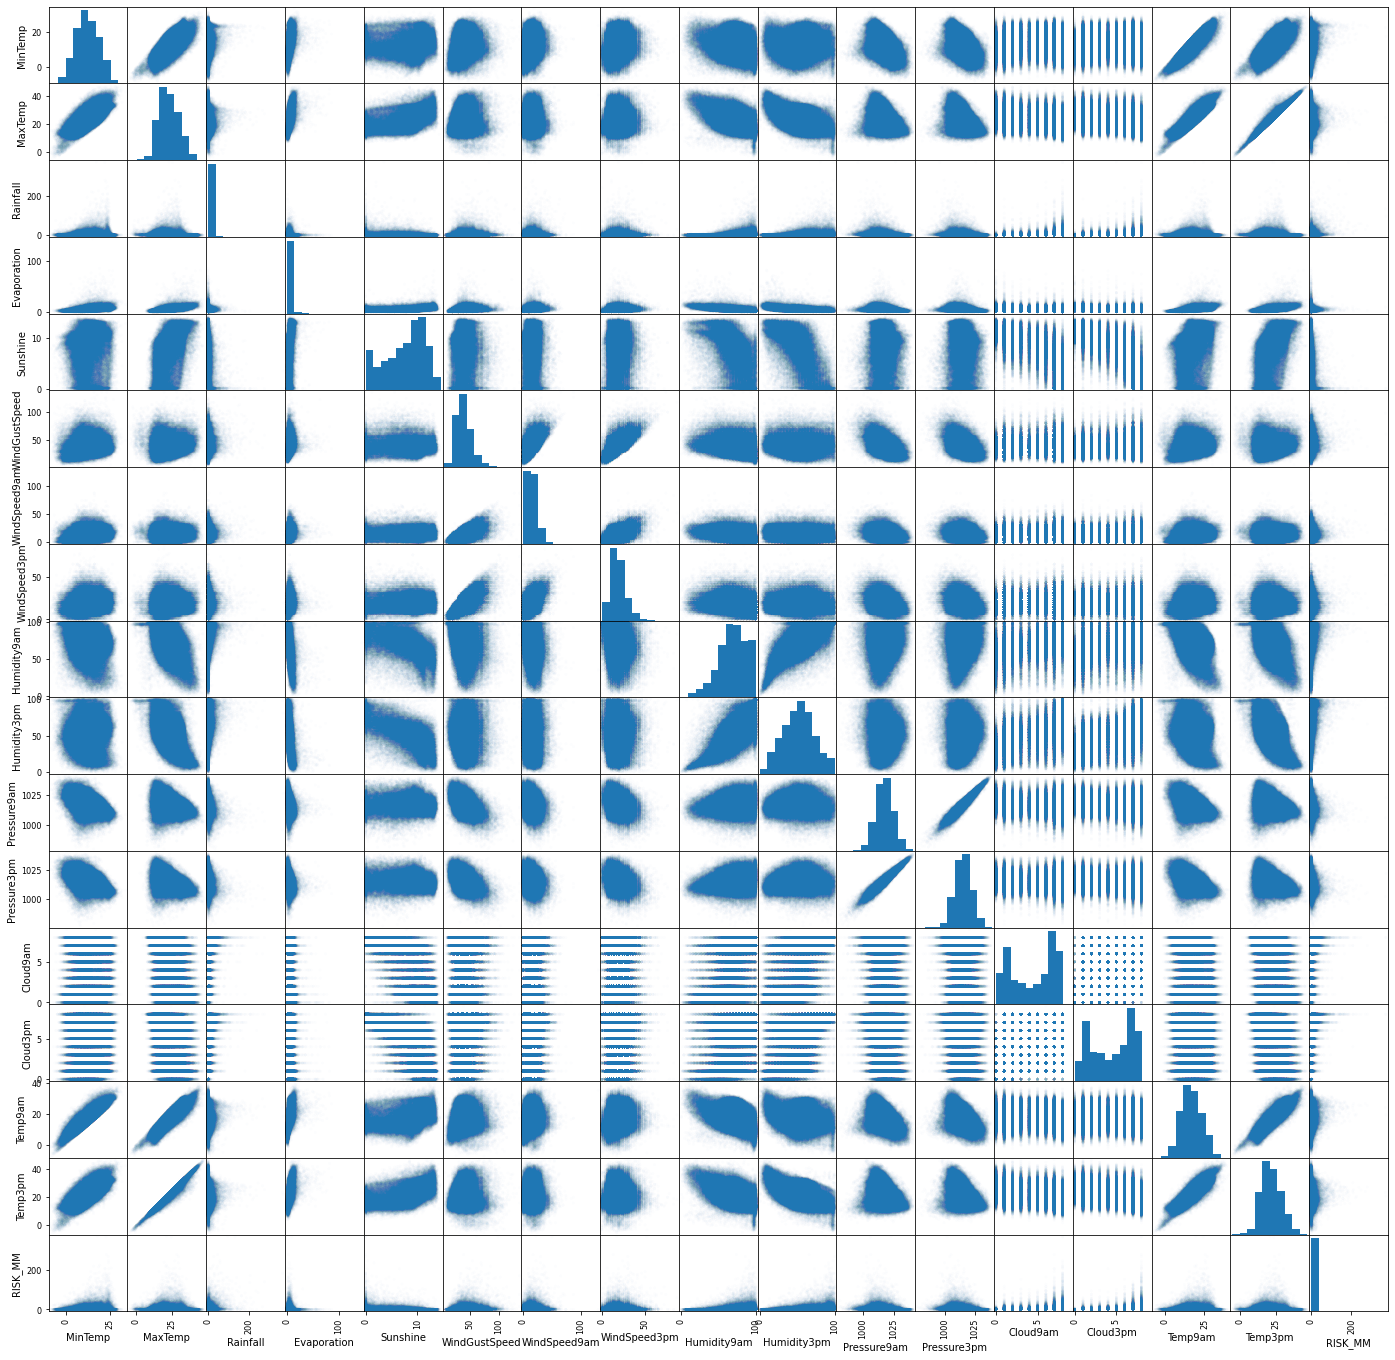

In [14]:
scatter_matrix(data, alpha = .01, figsize = (24, 24))
pass

Вычисляем корелляцию между признаками...

In [15]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


Некоторые признаки имеют линейную зависимость. Некоторые признаки не имеют вообще никакой зависимости.

Смотрим зависимости температуры и количества солнечных часов по каждому из месяцев...

In [16]:
data['month'] = pd.DatetimeIndex(data['Date']).month

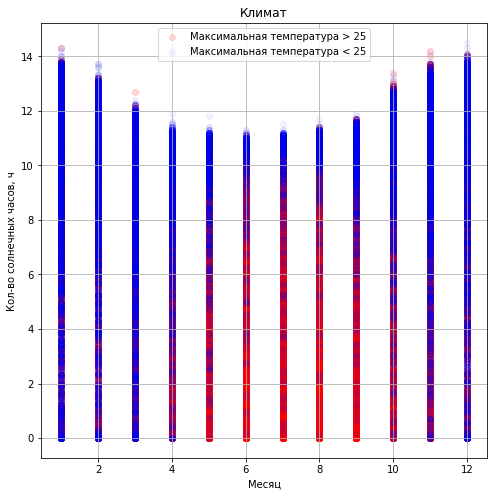

In [17]:
plt.figure(figsize = (8, 8))

plt.scatter(data[data['MaxTemp'] < 25]['month'],
            data[data['MaxTemp'] < 25]['Sunshine'],
            alpha = 0.15,
            label = 'Максимальная температура > 25',
            color = 'r')

plt.scatter(data[data['MaxTemp'] > 25]['month'],
            data[data['MaxTemp'] > 25]['Sunshine'],
            alpha = 0.05,
            label = 'Максимальная температура < 25',
            color = 'b')

plt.xlabel('Месяц')
plt.ylabel('Кол-во солнечных часов, ч')
plt.title('Климат')
plt.legend()
plt.grid()

Зимой солнечно и прохладно, летом пасмурно и тепло.

Смотрим на категориальные и количественные признаки...

In [18]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'month']


In [19]:
for c in categorical_columns:
    print(c, data[c].unique())

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday ['N

#### Обрабатываем пропущенные значения...

Наблюдаем наличие пропущенных значений...

In [20]:
data[numerical_columns].count(axis = 0)

MinTemp          141556
MaxTemp          141871
Rainfall         140787
Evaporation       81350
Sunshine          74377
WindGustSpeed    132923
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RISK_MM          142193
month            142193
dtype: int64

Находим медиану по каждому из признаков...

In [21]:
data.median(axis = 0)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
RISK_MM             0.0
month               6.0
dtype: float64

Заменяем пропущенные значения на медианы...

In [22]:
data = data.fillna(data.median(axis = 0), axis = 0)

Наблюдаем отсутствие пропущенных значений...

In [23]:
data[numerical_columns].count(axis = 0)

MinTemp          142193
MaxTemp          142193
Rainfall         142193
Evaporation      142193
Sunshine         142193
WindGustSpeed    142193
WindSpeed9am     142193
WindSpeed3pm     142193
Humidity9am      142193
Humidity3pm      142193
Pressure9am      142193
Pressure3pm      142193
Cloud9am         142193
Cloud3pm         142193
Temp9am          142193
Temp3pm          142193
RISK_MM          142193
month            142193
dtype: int64

Наблюдаем наличие пропущенных значений...

In [24]:
data[categorical_columns].count(axis = 0)

Date            142193
Location        142193
WindGustDir     132863
WindDir9am      132180
WindDir3pm      138415
RainToday       140787
RainTomorrow    142193
dtype: int64

In [25]:
data['WindDir9am'].describe()

count     132180
unique        16
top            N
freq       11393
Name: WindDir9am, dtype: object

In [26]:
type(data['WindDir9am'].describe())

pandas.core.series.Series

In [27]:
data['WindDir9am'].describe().top

'N'

In [28]:
data['WindDir3pm'].describe().top

'SE'

In [29]:
data.describe(include = [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2014-11-18,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [30]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [31]:
data.describe(include = [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,142193,142193,142193,142193,142193
unique,3436,49,16,16,16,2,2
top,2014-11-18,Canberra,W,N,SE,No,No
freq,49,3418,19110,21406,14441,110738,110316


Пропущенные значения обработаны..

#### Обрабатываем категориальные признаки...

In [32]:
data.drop(('Date'), axis = 1, inplace = True)

Разделим признаки на бинарные и небинарные..

In [33]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


Для бинарных признаков RainToday и RainTomorrow заменим Yes на единицу, а No на ноль..

In [34]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
data.at[data['RainToday'] == 'No', 'RainToday'] = 0
data.at[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'].describe()

count     142193
unique         2
top            0
freq      110738
Name: RainToday, dtype: int64

In [36]:
data.at[data['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
data.at[data['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
data['RainTomorrow'].describe()

count     142193
unique         2
top            0
freq      110316
Name: RainTomorrow, dtype: int64

Для небинарных признаков применяем метод векторизации..

In [37]:
nonbinary_columns = nonbinary_columns[1:]
nonbinary_columns

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [38]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [39]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Ulur

#### Нормализиция...

In [40]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,2.360682,6.402544
std,6.388936,7.109617,8.426426,3.185401,2.769638,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,8.477969,3.426506
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,6.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.800000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,12.000000


In [41]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [42]:
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,month
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,2.569612e-14,-1.810403e-14,-2.880211e-14,-1.051970e-12,5.161279e-14,1.991174e-15,6.786999e-15,-2.393872e-14,2.093354e-15,-2.782122e-15,1.492662e-11,-8.956525e-12,-2.727375e-15,2.541623e-14,1.631530e-14,-1.015192e-13,-3.255661e-14,-3.532720e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.237717e+00,-3.941895e+00,-2.761239e-01,-1.627177e+00,-2.903714e+00,-2.581316e+00,-1.580784e+00,-2.137692e+00,-3.637036e+00,-2.508045e+00,-5.506521e+00,-5.709902e+00,-2.026523e+00,-2.219540e+00,-3.736853e+00,-3.940477e+00,-2.784490e-01,-1.576692e+00
25%,-7.177353e-01,-7.490368e-01,-2.761239e-01,-3.714486e-01,5.696187e-02,-6.788199e-01,-7.899677e-01,-6.471545e-01,-6.263424e-01,-7.059995e-01,-6.149267e-01,-6.364265e-01,-7.189673e-01,-3.316373e-01,-7.239696e-01,-7.241742e-01,-2.784490e-01,-9.930071e-01
50%,-2.904469e-02,-8.796041e-02,-2.761239e-01,-1.203029e-01,1.652793e-01,-7.002119e-02,-1.121252e-01,4.078577e-02,6.030711e-02,2.455936e-02,-7.183260e-03,-7.854268e-03,1.527365e-01,1.403383e-01,-4.413962e-02,-8.382429e-02,-2.784490e-01,-1.174796e-01
75%,7.222541e-01,6.997051e-01,-2.049193e-01,6.805643e-02,2.374909e-01,4.626777e-01,5.657173e-01,6.140693e-01,7.469566e-01,6.577104e-01,6.153832e-01,6.207179e-01,5.885885e-01,6.123140e-01,6.974931e-01,6.729529e-01,-1.840867e-01,7.580480e-01
max,3.398756e+00,3.498731e+00,4.375203e+01,4.389299e+01,2.331628e+00,7.235564e+00,1.310580e+01,7.837442e+00,1.644883e+00,2.362348e+00,3.461401e+00,3.643851e+00,1.896144e+00,2.028241e+00,3.586771e+00,3.641848e+00,4.348203e+01,1.633576e+00


In [43]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(142193, 117)


Нормализованные данные помогают алгоритмам машинного обучения работать качественнее.

#### Разбиваем данные на обучающую и тестовую выборки...

In [44]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
0,0.190084,-0.045764,-0.204919,-0.120303,0.165279,0.310478,0.678691,0.614069,0.113126,-1.436558,...,0,0,0,0,0,0,1,0,0,0
1,-0.749039,0.263676,-0.276124,-0.120303,0.165279,0.310478,-1.128889,0.384756,-1.312992,-1.290447,...,0,0,0,0,0,0,0,1,0,0
2,0.111824,0.348069,-0.276124,-0.120303,0.165279,0.462678,0.565717,0.843383,-1.629907,-1.046927,...,0,0,0,0,0,0,0,1,0,0
3,-0.467302,0.671574,-0.276124,-0.120303,0.165279,-1.211519,-0.338073,-1.105781,-1.260173,-1.728782,...,0,0,0,0,0,0,0,0,0,0
4,0.831819,1.276389,-0.157450,-0.120303,0.165279,0.082178,-0.789968,0.155442,0.694137,-0.900815,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,-1.359470,-0.200484,-0.276124,-0.120303,0.165279,-0.678820,0.113822,-0.647154,-0.520704,-1.193039,...,0,0,0,0,0,0,0,0,0,0
142189,-1.469034,0.024563,-0.276124,-0.120303,0.165279,-0.678820,-0.112125,-0.876468,-0.943258,-1.339150,...,0,0,0,0,0,0,0,0,0,0
142190,-1.343818,0.291807,-0.276124,-0.120303,0.165279,-1.363718,-0.112125,-1.105781,-0.679162,-1.485262,...,0,0,0,0,0,0,0,0,0,0
142191,-1.062081,0.516854,-0.276124,-0.120303,0.165279,-0.222221,-0.564020,-1.105781,-0.837619,-1.339150,...,0,0,0,0,0,0,1,0,0,0


In [45]:
X = data.drop(('RainTomorrow'), axis = 1)
y = data['RainTomorrow']
feature_names = X.columns

In [46]:
type(feature_names)

pandas.core.indexes.base.Index

In [47]:
feature_names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'RainToday'],
      dtype='object', length=116)

In [48]:
print(X.shape)
print(y.shape)
N, d = X.shape

(142193, 116)
(142193,)


In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих и тестовых данных =  ' + str(N_train) + ' и ' + str(N_test))

Количество обучающих и тестовых данных =  99535 и 42658


#### Запускаем классификатор ближайших соседей (разное кол-во)...

In [52]:
num_neigh = [5, 10, 20]
y_train_predict = []
y_test_predict = []
for i in range(3):
    knn = KNeighborsClassifier(n_neighbors = num_neigh[i])
    knn.fit(X_train, list(y_train))
    y_train_predict.append(knn.predict(X_train))
    y_test_predict.append(knn.predict(X_test))

#### Вычисляем ошибки на обучающей и тестовой выборках, делаем выводы...

In [53]:
err_train = []
err_test = []
for i in range(3):
    err_train.append(np.mean(y_train != y_train_predict[i]))
    err_test.append(np.mean(y_test  != y_test_predict[i]))
    print('При k = ' + str(num_neigh[i]) + ' ошибка на тренировочном и тестовом наборе = ' \
          + str(err_train[i]) + ' и ' + str(err_test[i]))

При k = 5 ошибка на тренировочном и тестовом наборе = 0.09363540463153665 и 0.12468939003235033
При k = 10 ошибка на тренировочном и тестовом наборе = 0.11243281257848999 и 0.1246425055089315
При k = 20 ошибка на тренировочном и тестовом наборе = 0.11701411563771538 и 0.12325941206807632


Матрица ошибок для Knn с k = 20:

In [54]:
print(confusion_matrix(list(y_test), y_test_predict[2]))

[[32591   542]
 [ 4716  4809]]


Выводы: Классифицировать больший набор данных сложнее, поэтому чем больше k, тем меньше ошибка на тестовом наборе, и тем больше на тренировочном.